In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
%cd /content/drive/MyDrive/GitHub/

/content/drive/MyDrive/GitHub


In [33]:
%cd 'soil-physics-theory'

/content/drive/MyDrive/GitHub/soil-physics-theory


In [34]:
%cd 'content/chapter-6'

/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-6


<ipython-input-27-b7fcb0f84fc2>:18: RuntimeWarning: divide by zero encountered in divide
  Ks_sand = 0.07 * (theta_s * (1 - (psi_e_sand/matric_potential)**1/b_sand))**4                 #Equation_6.34
<ipython-input-27-b7fcb0f84fc2>:19: RuntimeWarning: divide by zero encountered in divide
  Ks_siltloam = 0.07 * (theta_s * (1 - (psi_e_siltloam/matric_potential)**1/b_siltloam))**4     #Equation_6.34
<ipython-input-27-b7fcb0f84fc2>:20: RuntimeWarning: divide by zero encountered in divide
  Ks_clay = 0.07 * (theta_s * (1 - (psi_e_clay/matric_potential)**1/b_clay))**4                 #Equation_6.34


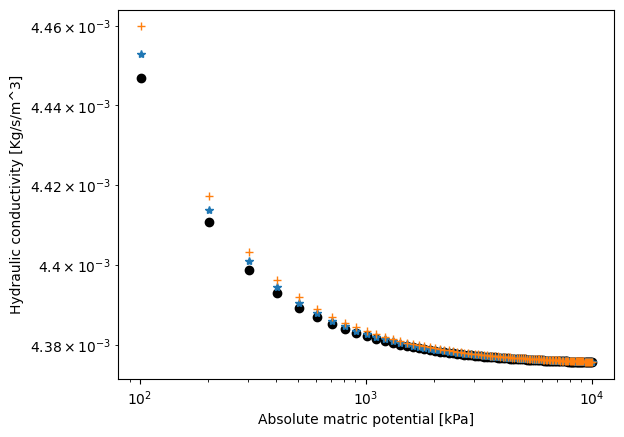

In [27]:
##Chapter_6.1

#Hydraulic conductivities of sand, silt loam, and clay

import matplotlib.pyplot as plt
import numpy as np

psi_e_sand = -0.7       #kPa
psi_e_siltloam = -2.1   #kPa
psi_e_clay = -3.7       #kPa
b_sand = 1.7
b_siltloam = 4.7
b_clay = 7.6
theta_s = 0.5           #m^3/m^3

matric_potential = np.linspace(0, 10000, 100)

Ks_sand = 0.07 * (theta_s * (1 - (psi_e_sand/matric_potential)**1/b_sand))**4                 #Equation_6.34
Ks_siltloam = 0.07 * (theta_s * (1 - (psi_e_siltloam/matric_potential)**1/b_siltloam))**4     #Equation_6.34
Ks_clay = 0.07 * (theta_s * (1 - (psi_e_clay/matric_potential)**1/b_clay))**4                 #Equation_6.34
#print(Ks_sand)
#print(Ks_siltloam)
#print(Ks_clay)

plt.loglog(matric_potential,Ks_sand, "ko")
plt.loglog(matric_potential,Ks_siltloam, "*")
plt.loglog(matric_potential,Ks_clay, "+")
plt.xlabel("Absolute matric potential [kPa]")
plt.ylabel("Hydraulic conductivity [Kg/s/m^3]")
plt.show()


In [ ]:
##Chapter_6.2

#Hydraulic conductivity calculation

